In [1]:
import pandas as pd 
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt
import sklearn.svm
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df= pd.read_csv("D:\\datalatih.csv", sep=',', names=['sentiment', 'txt'])
df_test= pd.read_csv("D:\\datauji.csv", sep=',', names=['sentiment', 'txt'])

In [4]:
df.head(30000)

sentiment                                                txt
0            1  RT @muit1924: Harusnya tetap dukung meski kebi...
1            1  Lagi ramai #BPJSRasaRentenir ya? Dulu, saya pe...
2            1  Kadang berfikir untuk tidak punya fikiran dala...
3            1  RT @J1n_Official: Sebenarnya dari Dulu udah Bn...
4            1  Alasan yang menurut gua mutlak dari pencabutan...
..         ...                                                ...
195          0  RT @bayangan_semar: #BPJSRasaRentenir\nKetika ...
196          0  RT @BinSukamdo_: @hacknet__71 Tengyu kamsiah p...
197          0  #BPJSRasaRentenir Jadi Trending Topic Gegara M...
198          0  Yang ditakuti rakyat adalah kenaikan harga2 ba...
199          0  "Kami tidak mau kalau hanya naik saja untuk me...

[200 rows x 2 columns]

# Preprocessing¶

# Casefolding - lowercase¶

In [5]:
df.txt = df.txt.str.lower()

In [6]:
df.head(30000)

sentiment                                                txt
0            1  rt @muit1924: harusnya tetap dukung meski kebi...
1            1  lagi ramai #bpjsrasarentenir ya? dulu, saya pe...
2            1  kadang berfikir untuk tidak punya fikiran dala...
3            1  rt @j1n_official: sebenarnya dari dulu udah bn...
4            1  alasan yang menurut gua mutlak dari pencabutan...
..         ...                                                ...
195          0  rt @bayangan_semar: #bpjsrasarentenir\nketika ...
196          0  rt @binsukamdo_: @hacknet__71 tengyu kamsiah p...
197          0  #bpjsrasarentenir jadi trending topic gegara m...
198          0  yang ditakuti rakyat adalah kenaikan harga2 ba...
199          0  "kami tidak mau kalau hanya naik saja untuk me...

[200 rows x 2 columns]

# Stopword Preparation

In [7]:
#TFIDF Vectorizer, just like before
stopset = set(stopwords.words('indonesian'))
katapenting = {'keluar','bukan','sebaik-baiknya','tersampaikan','menantikan','akhiri','menanyakan','lama','janganlah','tersampaikan'
              ,'kecil','bekerja','baik','bekerja','pernah','melakukan','ikut','tegas','diperlukan','sampaikan','jadilah','minta','lebih','setidak-tidaknya',
              'bersiap','tutur','mampukah','mengatakan','meyakini','belakangan','bersama-sama','mempergunakan','bersiap-siap','meyakinkan','sekecil','seenaknya','tandas','pukul',
              'pihak','dilihat','kemungkinan','tinggi','memastikan','meminta','jelas','bersama','cukup','lanjut','menuju','rasa','melihat','jelaskan',
              'keseluruhan','merasa','menaiki','sekedar','tahu','sendiri','penting','sendiri','sekurangnya','biasa','sekali-kali','mengakhiri',
              'ucap','diketahui','tertuju','menjawab','sudah','enggak','sesaat','seluruhnya','caranya','seolah-olah','mempunyai','menjadi','memberi','seluruh',
              'sebenarnya','mengerjakan','tengah','berjumlah','banyak','sampai','terjadi','boleh','jelaslah','dilalui','usah','diingatkan','sedikit','jawaban','demi',
              'diakhiri','sekadarnya','sejenak','kemungkinannya','bertaya-tanya','diperbuat','berapakah','ingin',
              'sebetulnya','mengucapkan','sudahkah','diantara','sesama','terutama','diperlihatkan','mendatangi','cukupkah','setinggi','meskipun','sebaiknya',
              'percuma','berlalu','paling','gunakan','beri','keterlaluan','masing-masing','seharusnya','sedemikian',
              'jangankan','tuturnya','bawah','sebesar','bertanya-tanya','sekalipun','belumlah','kembali','kepadanya','demikianlah','tunjuk','andalah','ditunjuk','anda','ditunjukkannya',
              'tidakkah','inginkah','ditujukan','dipastikan','menanti','diberikannya','diperlukannya','kelihatannya','bukanlah','sebisanya','ditambahkan',
              'jumlah','memulai','menjelaskan','dini','didapat','dahulu','diperbuatnya','memungkinkan','sejumlah',
              'menunjuki','masih','bisakah','menunjuk','secukupnya','seusai','diberi','ingat-ingat','sekurang-kurangnya',
              'rata','pihaknya','mendatang','ucapnya','dijawab','bermula','menunjukkan','memperlihatkan','sebab',
              'dimintai','berujar','ditandaskan','benarlah','pastilah','tandasnya','sendirinya','bisa','mengetahui','betul','asal','sepihak','berkali-kali','bolehkah',
              'mulailah','rasanya','bertutur','dibuat','menyangkut','setempat','cukuplah','pertanyaan','ditanyai','perlu','entah','ibarat','sudahlah','mendapatkan','terlihat',
              'membuat','turut','diingat','benar','sejauh','mulai','sepantasnyalah','persoalan','menginginkan','pasti','keinginan','memberikan','nyaris','panjang','mempersoalkan','menggunakan',
              'terlalu','mempersiapkan','umumnya','perlukah','pantas','menegaskan','bolehlah','mampu','berlangsung','memerlukan','perlunya','sekitarnya','sendirian','mau','sebagian',
              'khususnya','mirip','berturut-turut','guna','pentingnya','sebaiknya','berkata','dikerjakan','bertanya','belum','kurang','ditegaskan','ingat','sebuah','kelamaan','tambah',
              'tidaklah','berkehendak','lamanya','tegasnya','menambahkan','menyatakan','masalah','diucapkan','selama-lamanya','terasa','siap','nyatanya','semampunya','jawab','kelihatan','menyeluruh',
              'tepat','umum','mengingatkan','seringnya','melihatnya','memihak','berlebihan','berlainan','yakin','menyiapkan','dipergunakan','naik','jauh','benarkah','seperlunya','dekat','menuturkan',
              'terbanyak','kasus','pertama','entahlah','kesampaian'}
stopsetbaru = stopset - katapenting
print (stopsetbaru)
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopsetbaru)
#print (stopset)

{'dimulainya', 'hingga', 'mengibaratkannya', 'dirinya', 'mereka', 'sebanyak', 'jangan', 'sehingga', 'semasih', 'hampir', 'pula', 'seperti', 'biasanya', 'wahai', 'semampu', 'bukankah', 'ditanya', 'juga', 'ditanyakan', 'hendaknya', 'memintakan', 'setengah', 'malahan', 'seolah', 'agar', 'supaya', 'pun', 'hanya', 'sering', 'sesampai', 'besar', 'betulkah', 'berkeinginan', 'berawal', 'sana', 'rupanya', 'beginilah', 'akankah', 'tiba', 'dia', 'manalagi', 'apalagi', 'disebut', 'tersebutlah', 'kelima', 'se', 'sebagai', 'sambil', 'serta', 'katakanlah', 'seorang', 'cuma', 'bilakah', 'beginikah', 'lima', 'itukah', 'bagian', 'menandaskan', 'bagai', 'adalah', 'memperbuat', 'selamanya', 'selalu', 'sesuatu', 'tentunya', 'jelasnya', 'begini', 'sini', 'akulah', 'tadi', 'terhadapnya', 'bermacam', 'jawabnya', 'tampaknya', 'seseorang', 'terus', 'dijelaskannya', 'itu', 'semaunya', 'wah', 'disebutkan', 'bung', 'setelah', 'karena', 'tambahnya', 'lalu', 'keadaan', 'dilakukan', 'oleh', 'termasuk', 'terlebih', 's

In [8]:
#in this case our dependent variable will be sentiment as 0 (negative) or 1 (positif)
y = df.sentiment

# Stopword Removal & Tokenizing & Casefolding¶

In [9]:
#convert df.txt from text to features
X= vectorizer.fit_transform(df.txt)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ingat', 'mata', 'menanti', 'pertama', 'sampai', 'tama'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [10]:
#6918 observations x 2022 unique words.
print (y.shape)
print (X.shape)

(200,)
(200, 1034)


In [11]:
#Test Train Split as usual
X_train, X_valid,y_train, y_valid = train_test_split(X, y, random_state=42)

In [12]:
#we will train a svm classifier
clf = svm.SVC(gamma ='scale',probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Akurasi¶

In [13]:
#We can test our model's accuracy like this:

roc_auc_score(y_valid, clf.predict_proba(X_valid) [:,1])

0.9460547504025765

In [14]:
uji_sistem_vector = vectorizer.transform(df_test.txt)

In [15]:
print (clf.predict(uji_sistem_vector))

[0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0]


# Data Uji¶

In [16]:
#print(data_uji)
add = pd.DataFrame(df_test.txt)
add.head(300)

txt
0   #BPJSRasaRentenir Jadi Trending Topic Gegara M...
1   RT @WarisLubis: Beban yang ditanggung begitu b...
2   RT @WarisLubis: Beban yang ditanggung begitu b...
3   RT @BamsBulaksumur: Mahasiswa : "Pak kok ada y...
4   Pagi"gw misuh" k bpjs pemerintah ma pengguna b...
..                                                ...
95  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...
96  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...
97  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...
98  RT @Anggraini_4yu: Tiap Bulan WAJIB BAYAR\nGa ...
99  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...

[100 rows x 1 columns]

# Label Manual¶

In [17]:
ujimanual = [0,1,1,1,1,0,0,0,1,0,
             1,1,1,1,0,0,0,1,1,0,
             0,0,1,1,1,1,0,1,0,0,
             0,0,0,1,1,1,0,0,0,1,
             1,0,1,1,0,1,0,0,0,1,
             0,0,0,1,1,0,1,1,0,0,
             0,0,0,0,0,0,0,0,0,1,
             1,1,0,0,0,0,0,1,1,1,
             1,0,0,1,0,0,1,1,0,0,
             0,0,1,0,0,0,0,0,0,0]
#print(data_uji)
prediksi = clf.predict(uji_sistem_vector)
ketepatanprediksi = []
for uji in range(len(ujimanual)):
    if ujimanual[uji] == prediksi[uji]:
        ketepatanprediksi.append("Tepat")
    else:
        ketepatanprediksi.append("Tidak Tepat")
add = pd.DataFrame({'Tweet':df_test.txt, 'Sentiment':prediksi, 'Uji Manual':ujimanual, 'Ketepatan Prediksi':ketepatanprediksi})
add.head(300)

Tweet  Sentiment  Uji Manual  \
0   #BPJSRasaRentenir Jadi Trending Topic Gegara M...          0           0   
1   RT @WarisLubis: Beban yang ditanggung begitu b...          1           1   
2   RT @WarisLubis: Beban yang ditanggung begitu b...          1           1   
3   RT @BamsBulaksumur: Mahasiswa : "Pak kok ada y...          1           1   
4   Pagi"gw misuh" k bpjs pemerintah ma pengguna b...          0           1   
..                                                ...        ...         ...   
95  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...          0           0   
96  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...          0           0   
97  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...          0           0   
98  RT @Anggraini_4yu: Tiap Bulan WAJIB BAYAR\nGa ...          0           0   
99  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...          0           0   

   Ketepatan Prediksi  
0               Tepat  
1               Tepat  
2               Tepat  
3               Tepat  
4         Tidak Tepat  
..                ...  
95              Tepat  
96              Tepat  
97              Tepat  
98              Tepat  
99              Tepat  

[100 rows x 4 columns]

In [18]:
df ['prediksi'] = pd.DataFrame(prediksi)
df ['ujimanual'] = pd.DataFrame(ujimanual)

In [19]:
def compute_tp_tn_fn_fp(prediksi, ujimanual):
    tp = sum((prediksi == 1) & (ujimanual == 1))
    tn = sum((prediksi == 0) & (ujimanual == 0))
    fn = sum((prediksi == 1) & (ujimanual == 0))
    fp = sum((prediksi == 0) & (ujimanual == 1))
    return tp, tn, fn, fp

# Hasil Perbandingan Uji Sistem & Manual

In [20]:
tp, tn, fn, fp = compute_tp_tn_fn_fp (df.prediksi, df.ujimanual)
print('TP :', tp)
print('TN :', tn)
print('FN :', fn)
print('FP :', fp)

TP : 34
TN : 57
FN : 3
FP : 6


In [21]:
def compute_akurasi(tp, tn, fn, fp) :
    '''
    akurasi = TP + TN / TP + TN + FP + FN
    '''
    return ((tp + tn) *100)/ float(tp + tn +fn + fp)

In [22]:
print ('akurasi :', compute_akurasi(tp, tn, fn, fp))

akurasi : 91.0


In [23]:
def compute_precision(tp, fp):
    '''
    precision = TP / FP + TP
    '''
    return (tp * 100)/ float (tp + fp)

In [24]:
print('Precision :', compute_precision(tp, fp))

Precision : 85.0


In [25]:
def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP
    '''
    return (tp * 100)/ float (tp + fn)

In [26]:
print('Recall :', compute_recall(tp, fn))

Recall : 91.89189189189189


In [27]:
def compute_f1_score(prediksi, ujimanual) :
    
    tp,tn,fp,fn = compute_tp_tn_fn_fp (prediksi, ujimanual)
    precision = compute_precision(tp,fp)/100
    recall = compute_recall(tp,fn)/100
    f1_score = (2*precision*recall)/(precision + recall)
    return f1_score

In [28]:
print ('f1score :', compute_f1_score(df.prediksi, df.ujimanual))

f1score : 0.883116883116883


In [29]:
print ('akurasi :', compute_akurasi(tp, tn, fn, fp))
print ('precision :', compute_precision(tp, fp))
print ('recall :', compute_recall(tp, fn))
print ('f1score :', compute_f1_score(df.prediksi, df.ujimanual))

akurasi : 91.0
precision : 85.0
recall : 91.89189189189189
f1score : 0.883116883116883


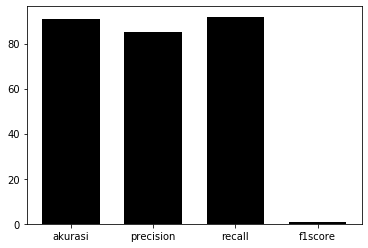

In [30]:
labels = ['akurasi','precision','recall','f1score']
values = [compute_akurasi(tp,tn,fn,fp ),compute_precision(tp,fp),compute_recall(tp,fn),compute_f1_score(df.prediksi, df.ujimanual)]
position = [0,1,2,3]
plt.bar (position, values, width=0.7, color='black')
plt.xticks(position,labels)
plt.show()

In [ ]:
011100000000010000000010000000000000000010000000000000000000000000010001000000000001000000001000000